<a href="https://colab.research.google.com/github/natmonge/UCDPA_NataliaMongelos/blob/main/Data_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# packages

# standard
import numpy as np
import pandas as pd
import requests
import urllib.parse
pd.set_option('display.max_rows', None) # I want to be able to see all rows

# plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORTING CONSUMER CONFIDENCE INDEX FROM 2 DATA SOURCES AND MERGING THEM


In [4]:
# wrapper to API call

def get_api_call(ids, **kwargs):
    API_BASE_URL = "https://apis.datos.gob.ar/series/api/"
    kwargs["ids"] = ",".join(ids)
    return "{}{}?{}".format(API_BASE_URL, "series", urllib.parse.urlencode(kwargs))
    
# convert the API call in CSV to a DataFrame using pandas
CCI_ARG = pd.read_csv(get_api_call(
    ["380.3_ICC_NACIONNAL_0_T_12"],
    format="csv", start_date=2015
))

#rename columns to match OECD columns
CCI_ARG.rename(columns = {'indice_tiempo':'TIME','icc_nacional':'Value'}, inplace = True)


# Using DataFrame.insert() to add a column
CCI_ARG.insert(0, "LOCATION",'ARG')

print (CCI_ARG)

   LOCATION        TIME      Value
0       ARG  2015-01-01  49.948658
1       ARG  2015-02-01  50.473072
2       ARG  2015-03-01  52.600952
3       ARG  2015-04-01  52.850000
4       ARG  2015-05-01  54.994553
5       ARG  2015-06-01  54.881054
6       ARG  2015-07-01  56.090000
7       ARG  2015-08-01  56.781574
8       ARG  2015-09-01  54.618008
9       ARG  2015-10-01  56.962151
10      ARG  2015-11-01  60.350544
11      ARG  2015-12-01  54.894997
12      ARG  2016-01-01  54.007343
13      ARG  2016-02-01  45.594051
14      ARG  2016-03-01  48.157730
15      ARG  2016-04-01  43.185665
16      ARG  2016-05-01  42.657166
17      ARG  2016-06-01  42.571453
18      ARG  2016-07-01  45.605362
19      ARG  2016-08-01  42.602177
20      ARG  2016-09-01  43.293732
21      ARG  2016-10-01  46.040760
22      ARG  2016-11-01  43.934200
23      ARG  2016-12-01  44.480000
24      ARG  2017-01-01  44.466782
25      ARG  2017-02-01  40.681772
26      ARG  2017-03-01  40.950099
27      ARG  2017-04

In [5]:
# import CCI OECD data

path= "/content/drive/MyDrive/Data Sets/CCI-OECD 2015-2023.csv"

CCI_OECD= pd.read_csv(path)

CCI_OECD

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-01,100.46650,NaN
1,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-02,100.60350,NaN
2,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-03,100.66180,NaN
3,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-04,100.65990,NaN
4,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-05,100.59340,NaN
5,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-06,100.54270,NaN
6,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-07,100.43050,NaN
7,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-08,100.33570,NaN
8,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-09,100.30260,NaN
9,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-10,100.40880,NaN


In [6]:
# CONCATENATE VERTICALLY CCI_ARG DATAFRAME to the CCI_OECD DATAFRAME AND ONLY GET MATCHING COLUMNS
ALL_CCI= pd.concat([CCI_OECD, CCI_ARG], ignore_index = True, join='inner')

print (ALL_CCI)

    LOCATION        TIME       Value
0       OECD     2015-01  100.466500
1       OECD     2015-02  100.603500
2       OECD     2015-03  100.661800
3       OECD     2015-04  100.659900
4       OECD     2015-05  100.593400
5       OECD     2015-06  100.542700
6       OECD     2015-07  100.430500
7       OECD     2015-08  100.335700
8       OECD     2015-09  100.302600
9       OECD     2015-10  100.408800
10      OECD     2015-11  100.548000
11      OECD     2015-12  100.594400
12      OECD     2016-01  100.525400
13      OECD     2016-02  100.415400
14      OECD     2016-03  100.351800
15      OECD     2016-04  100.358900
16      OECD     2016-05  100.416100
17      OECD     2016-06  100.407000
18      OECD     2016-07  100.328700
19      OECD     2016-08  100.313200
20      OECD     2016-09  100.348600
21      OECD     2016-10  100.384700
22      OECD     2016-11  100.458600
23      OECD     2016-12  100.519400
24      OECD     2017-01  100.517900
25      OECD     2017-02  100.543100
2

In [7]:
# CONFIRM IF THERE ARE DUPLICATES.
ALL_CCI.info()

ALL_CCI.drop_duplicates(inplace=True)
ALL_CCI.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  389 non-null    object 
 1   TIME      389 non-null    object 
 2   Value     389 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.2+ KB


(389, 3)

In [8]:
# CLEAN TIME COLUMN

ALL_CCI['TIME'] = pd.to_datetime(ALL_CCI['TIME'])

print(ALL_CCI)

    LOCATION       TIME       Value
0       OECD 2015-01-01  100.466500
1       OECD 2015-02-01  100.603500
2       OECD 2015-03-01  100.661800
3       OECD 2015-04-01  100.659900
4       OECD 2015-05-01  100.593400
5       OECD 2015-06-01  100.542700
6       OECD 2015-07-01  100.430500
7       OECD 2015-08-01  100.335700
8       OECD 2015-09-01  100.302600
9       OECD 2015-10-01  100.408800
10      OECD 2015-11-01  100.548000
11      OECD 2015-12-01  100.594400
12      OECD 2016-01-01  100.525400
13      OECD 2016-02-01  100.415400
14      OECD 2016-03-01  100.351800
15      OECD 2016-04-01  100.358900
16      OECD 2016-05-01  100.416100
17      OECD 2016-06-01  100.407000
18      OECD 2016-07-01  100.328700
19      OECD 2016-08-01  100.313200
20      OECD 2016-09-01  100.348600
21      OECD 2016-10-01  100.384700
22      OECD 2016-11-01  100.458600
23      OECD 2016-12-01  100.519400
24      OECD 2017-01-01  100.517900
25      OECD 2017-02-01  100.543100
26      OECD 2017-03-01  100

In [9]:
#splitting the table by LOCATION and setting a time range using query on multiple conditions. SET INDEX TO TIME
ARG_CCI = ALL_CCI.query('LOCATION=="ARG" and TIME <"2020-12-31"')
ARG_CCI.set_index('TIME', inplace=True)
print(ARG_CCI)


USA_CCI = ALL_CCI.query('LOCATION=="USA" and TIME < "2020-12-31"')
USA_CCI.set_index('TIME', inplace=True)
print(USA_CCI)

           LOCATION      Value
TIME                          
2015-01-01      ARG  49.948658
2015-02-01      ARG  50.473072
2015-03-01      ARG  52.600952
2015-04-01      ARG  52.850000
2015-05-01      ARG  54.994553
2015-06-01      ARG  54.881054
2015-07-01      ARG  56.090000
2015-08-01      ARG  56.781574
2015-09-01      ARG  54.618008
2015-10-01      ARG  56.962151
2015-11-01      ARG  60.350544
2015-12-01      ARG  54.894997
2016-01-01      ARG  54.007343
2016-02-01      ARG  45.594051
2016-03-01      ARG  48.157730
2016-04-01      ARG  43.185665
2016-05-01      ARG  42.657166
2016-06-01      ARG  42.571453
2016-07-01      ARG  45.605362
2016-08-01      ARG  42.602177
2016-09-01      ARG  43.293732
2016-10-01      ARG  46.040760
2016-11-01      ARG  43.934200
2016-12-01      ARG  44.480000
2017-01-01      ARG  44.466782
2017-02-01      ARG  40.681772
2017-03-01      ARG  40.950099
2017-04-01      ARG  46.190000
2017-05-01      ARG  45.760000
2017-06-01      ARG  42.042889
2017-07-

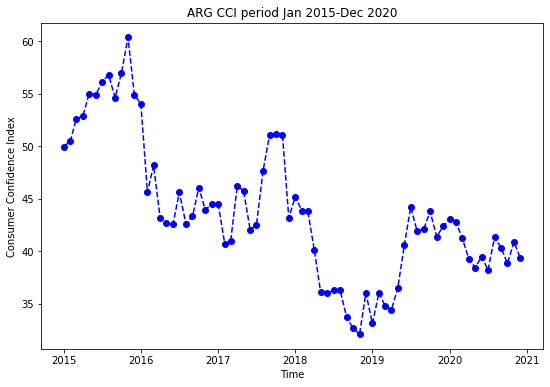

In [10]:
plt.rcParams['figure.figsize'] = (9, 6)

fig, ax=plt.subplots()

ax.plot(ARG_CCI.index, ARG_CCI["Value"], marker="o", linestyle="--", color="b")
ax.set_xlabel("Time")
ax.set_ylabel("Consumer Confidence Index")
ax.set_title ("ARG CCI period Jan 2015-Dec 2020")

plt.show()

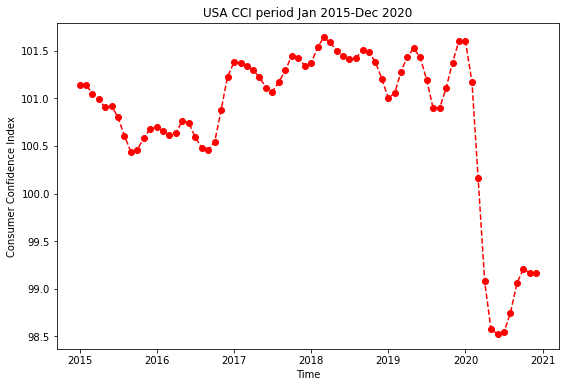

In [12]:
plt.rcParams['figure.figsize'] = (9, 6)
fig, ax=plt.subplots()

ax.plot(USA_CCI.index, USA_CCI["Value"], marker="o", linestyle="--", color="r")
ax.set_xlabel("Time")
ax.set_ylabel("Consumer Confidence Index")
ax.set_title ("USA CCI period Jan 2015-Dec 2020")

plt.show()

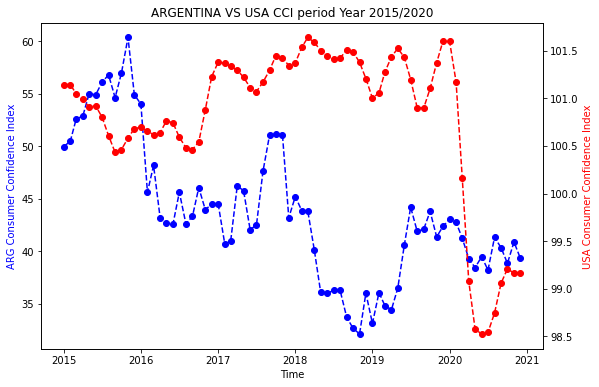

In [13]:
# Plotting time series with different variables
plt.rcParams['figure.figsize'] = (9, 6)


fig, ax=plt.subplots()
ax.plot(ARG_CCI.index, ARG_CCI["Value"], marker="o", linestyle="--", color="b")
ax.set_xlabel("Time")
ax.set_ylabel("ARG Consumer Confidence Index", color='blue')
ax2 = ax.twinx()
ax2.plot(USA_CCI.index, USA_CCI["Value"], marker="o", linestyle="--", color="r")
ax2.set_ylabel("USA Consumer Confidence Index", color='red')

ax.set_title ("ARGENTINA VS USA CCI period Year 2015/2020")
plt.show()

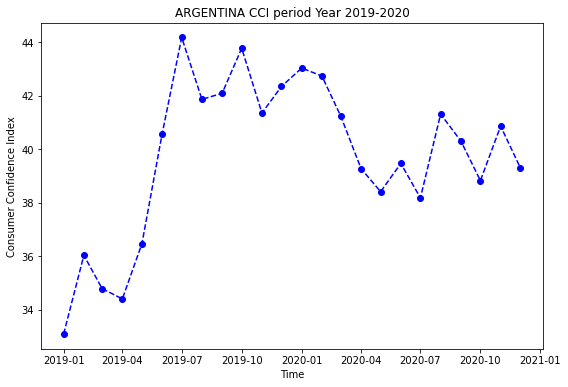

In [14]:
#zooming on ARG Period 2019-2020 BY SLICING INTO THE DATAFRAME
plt.rcParams['figure.figsize'] = (9, 6)
nineteen = ARG_CCI["2019-01-01":"2020-12-31"]
fig, ax=plt.subplots()
ax.plot(nineteen.index, nineteen["Value"], marker="o", linestyle="--", color="b")
ax.set_xlabel("Time")
ax.set_ylabel("Consumer Confidence Index")
ax.set_title ("ARGENTINA CCI period Year 2019-2020")
plt.show()

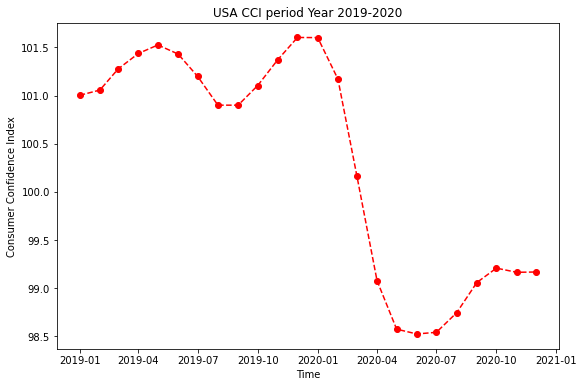

In [15]:
#zooming on USA Period 2019-2020 BY SLICING INTO THE DATAFRAME
plt.rcParams['figure.figsize'] = (9, 6)
nineteenusa = USA_CCI["2019-01-01":"2020-12-31"]
fig, ax=plt.subplots()
ax.plot(nineteenusa.index, nineteenusa["Value"], marker="o", linestyle="--", color="r")
ax.set_xlabel("Time")
ax.set_ylabel("Consumer Confidence Index")
ax.set_title ("USA CCI period Year 2019-2020")
plt.show()

# CALCULATING DIFFERENCES

In [31]:
#splitting the table by LOCATION and setting a time range using query on multiple conditions. Adding 2 columns
ARG_CCI1 = ALL_CCI.query('LOCATION=="ARG" and TIME <"2020-12-31" and TIME >= "2018-12-01"')
ARG_CCI1.set_index('TIME', inplace=True)
ARG_CCI1['CHANGE']=ARG_CCI1['Value'].diff()
ARG_CCI1['PCT_CHANGE']=ARG_CCI1['Value'].pct_change()
print(ARG_CCI1)


USA_CCI1 = ALL_CCI.query('LOCATION=="USA" and TIME <"2020-12-31" and TIME >= "2018-12-01"')
USA_CCI1.set_index('TIME', inplace=True)
USA_CCI1['CHANGE']=USA_CCI1['Value'].diff()
USA_CCI1['PCT_CHANGE']=USA_CCI1['Value'].pct_change()

print(USA_CCI1)

           LOCATION      Value    CHANGE  PCT_CHANGE
TIME                                                
2018-12-01      ARG  35.989628       NaN         NaN
2019-01-01      ARG  33.101078 -2.888550   -0.080261
2019-02-01      ARG  36.039967  2.938889    0.088785
2019-03-01      ARG  34.794621 -1.245346   -0.034555
2019-04-01      ARG  34.411144 -0.383477   -0.011021
2019-05-01      ARG  36.472500  2.061356    0.059904
2019-06-01      ARG  40.574234  4.101734    0.112461
2019-07-01      ARG  44.176544  3.602310    0.088783
2019-08-01      ARG  41.862835 -2.313709   -0.052374
2019-09-01      ARG  42.093285  0.230450    0.005505
2019-10-01      ARG  43.772411  1.679126    0.039891
2019-11-01      ARG  41.354538 -2.417873   -0.055237
2019-12-01      ARG  42.348259  0.993721    0.024029
2020-01-01      ARG  43.034500  0.686241    0.016205
2020-02-01      ARG  42.734993 -0.299507   -0.006960
2020-03-01      ARG  41.230610 -1.504383   -0.035203
2020-04-01      ARG  39.276279 -1.954331   -0.

<ipython-input-31-ccd0aa039515>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ARG_CCI1['CHANGE']=ARG_CCI1['Value'].diff()
<ipython-input-31-ccd0aa039515>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ARG_CCI1['PCT_CHANGE']=ARG_CCI1['Value'].pct_change()
<ipython-input-31-ccd0aa039515>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [17]:
ARG_CCI1.describe()

,Value,CHANGE,PCT_CHANGE
count,25.000000,24.000000,24.000000
mean,39.598991,0.138723,0.005043
std,3.045073,2.053633,0.053596
min,33.101078,-2.888550,-0.080261
25%,38.183365,-1.485812,-0.035578
50%,40.309917,-0.341492,-0.008990
75%,41.862835,1.768041,0.043018
max,44.176544,4.101734,0.112461


In [18]:
USA_CCI1.describe()

,Value,CHANGE,PCT_CHANGE
count,25.000000,24.000000,24.000000
mean,100.360538,-0.084999,-0.000842
std,1.168379,0.365575,0.003637
min,98.524100,-1.091130,-0.010893
25%,99.164540,-0.212250,-0.002096
50%,101.002300,0.001495,0.000015
75%,101.276000,0.171238,0.001696
max,101.603000,0.314020,0.003180


In [19]:
USA_CCI.min()

LOCATION        USA
Value       98.5241
dtype: object

In [20]:
# MERGE USA AND ARG , ADD SUFFIXES AND REMOVE UNWANTED COLUMNS AND THE FIRST ROW WITH NAN VALUES
USA_ARG=pd.merge_ordered(ARG_CCI1, USA_CCI1, on='TIME', suffixes =('_ARG', '_USA'))
USA_ARG=USA_ARG.loc[1:,("TIME", "CHANGE_ARG","CHANGE_USA", "PCT_CHANGE_ARG", "PCT_CHANGE_USA")]
USA_ARG.set_index('TIME', inplace=True)
print(USA_ARG)

            CHANGE_ARG  CHANGE_USA  PCT_CHANGE_ARG  PCT_CHANGE_USA
TIME                                                              
2019-01-01   -2.888550    -0.20530       -0.080261   -2.028504e-03
2019-02-01    2.938889     0.05450        0.088785    5.395917e-04
2019-03-01   -1.245346     0.21920       -0.034555    2.169077e-03
2019-04-01   -0.383477     0.16070       -0.011021    1.586753e-03
2019-05-01    2.061356     0.08840        0.059904    8.714795e-04
2019-06-01    4.101734    -0.09430        0.112461   -9.288343e-04
2019-07-01    3.602310    -0.23310        0.088783   -2.298119e-03
2019-08-01   -2.313709    -0.29770       -0.052374   -2.941766e-03
2019-09-01    0.230450    -0.00010        0.005505   -9.910803e-07
2019-10-01    1.679126     0.20400        0.039891    2.021806e-03
2019-11-01   -2.417873     0.27010       -0.055237    2.671509e-03
2019-12-01    0.993721     0.22900        0.024029    2.258962e-03
2020-01-01    0.686241    -0.00160        0.016205   -1.574757

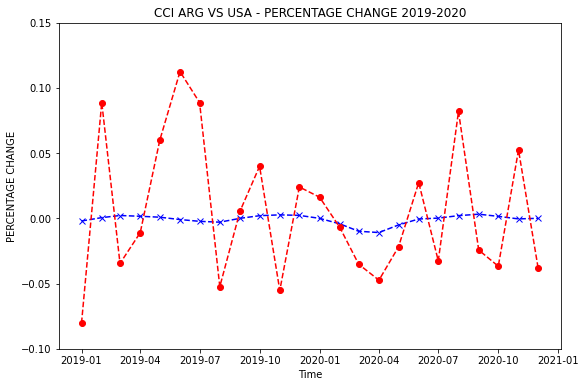

In [47]:
#Compare CCI PERCENTAGE CHANGE BETWEEN ARG AND US FOR PERIOD 2019-2020. 
#Change y axis scale to make graph more meaningful
plt.rcParams['figure.figsize'] = (9, 6)

fig, ax=plt.subplots()

ax.plot(USA_ARG.index, USA_ARG["PCT_CHANGE_USA"], marker="x", linestyle="--", color="b")
ax.plot(USA_ARG.index, USA_ARG["PCT_CHANGE_ARG"], marker="o", linestyle="--", color="r")
ax.set_xlabel("Time")
ax.set_ylabel("PERCENTAGE CHANGE")
ax.set_title ("CCI ARG VS USA - PERCENTAGE CHANGE 2019-2020")
plt.ylim(bottom=-0.10, top=0.15)
plt.show()

In [ ]:
# RETURN A BOOLEAN FOR TRUE WHEN VARIATION BIGGER FOR USA?


In [21]:
print(USA_ARG[['CHANGE_ARG', 'CHANGE_USA']])


            CHANGE_ARG  CHANGE_USA
TIME                              
2019-01-01   -2.888550    -0.20530
2019-02-01    2.938889     0.05450
2019-03-01   -1.245346     0.21920
2019-04-01   -0.383477     0.16070
2019-05-01    2.061356     0.08840
2019-06-01    4.101734    -0.09430
2019-07-01    3.602310    -0.23310
2019-08-01   -2.313709    -0.29770
2019-09-01    0.230450    -0.00010
2019-10-01    1.679126     0.20400
2019-11-01   -2.417873     0.27010
2019-12-01    0.993721     0.22900
2020-01-01    0.686241    -0.00160
2020-02-01   -0.299507    -0.43030
2020-03-01   -1.504383    -1.00320
2020-04-01   -1.954331    -1.09113
2020-05-01   -0.859844    -0.50262
2020-06-01    1.052773    -0.05005
2020-07-01   -1.285843     0.01739
2020-08-01    3.130714     0.20285
2020-09-01   -1.004162     0.31402
2020-10-01   -1.479621     0.14950
2020-11-01    2.034786    -0.04332
2020-12-01   -1.546112     0.00309
